In [59]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from matplotlib.ticker import FuncFormatter
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib.patches import Ellipse
from matplotlib.patches import Patch
from pointpats import QStatistic
from matplotlib.lines import Line2D
from shapely.geometry import Point
from pointpats import random
from pointpats import distance_statistics
from sklearn.neighbors import KernelDensity

In [19]:
print("Análisis de la distribución espacial de depósitos Ígneo/Metamórficos en Colombia \n \n >>Pregunta: ¿Los depositos minerales en Colombia, relacionados con procesos Ígneo/Metamórficos, \n siguen patrones o están asociados a variables que pueden llegar a explicar su distribucion \n y ayudar con su prediccion de ubicacion?")

Análisis de la distribución espacial de depósitos Ígneo/Metamórficos en Colombia 
 
 >>Pregunta: ¿Los depositos minerales en Colombia, relacionados con procesos Ígneo/Metamórficos, 
 siguen patrones o están asociados a variables que pueden llegar a explicar su distribucion 
 y ayudar con su prediccion de ubicacion?


In [54]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)
depositos = "C:/Git_SCA/AGE/Depositos/Depositos.shp"
gdf = gpd.read_file(depositos)
print("\nINSUMOS \n")
print("\nVista previa completa Ocurrencia de Depositos:")
print(gdf.head())
print(gdf.head())


INSUMOS 


Vista previa completa Ocurrencia de Depositos:
                             IG_EST  IG_DEP   IG_MUN            IG_POB  IG_LAT_W84  IG_LON_W84                D_PR_PAL1                  D_MI_PAL1                         D_CLAS_DEP             R_RO_HUES                   geometry
0  Productor pasado - Cielo abierto   Valle  Bolívar           Bolívar    4.316845  -76.229189          Magnesita-MgCO3            Magnesita-MgCO3  Asociado_a_magmas_máficos_básicos  ROCA_ÍGNEA_PLUTÓNICA  POINT (-76.22919 4.31684)
1         Productor - Cielo abierto   Valle  Bolívar           Bolívar    4.334440  -76.197300          Magnesita-MgCO3            Magnesita-MgCO3  Asociado_a_magmas_máficos_básicos  ROCA_ÍGNEA_PLUTÓNICA   POINT (-76.1973 4.33444)
2                        Ocurrencia  Caldas    Neira             Neira    5.157379  -75.605610  Crisotilo-Mg3Si2O5(OH)4  Crisotilo-Mg3(Si2O5)(OH)4  Asociado_a_magmas_máficos_básicos      ROCA_METAMÓRFICA  POINT (-75.60561 5.15738)
3                

In [51]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)
depositos = "C:/Git_SCA/AGE/Corteza"
gdf = gpd.read_file(depositos)
print("\nINSUMOS \n")
print("\nVista previa completa Profundidad de Moho:")
print(gdf.head())


INSUMOS 


Vista previa completa Profundidad de Moho:
      X     Y          Z                     geometry
0 -90.0  15.0  40.501598     POINT Z (-90 15 40.5016)
1 -89.5  15.0  38.480438  POINT Z (-89.5 15 38.48044)
2 -89.0  15.0  37.246517    POINT Z (-89 15 37.24652)
3 -88.5  15.0  36.913651  POINT Z (-88.5 15 36.91365)
4 -88.0  15.0  37.215492    POINT Z (-88 15 37.21549)


In [61]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)
depositos = "C:/Git_SCA/AGE/Dataciones"
gdf = gpd.read_file(depositos)
print("\nINSUMOS \n")
print("\nVista previa completa Dataciones:")
print(gdf.tail())


INSUMOS 


Vista previa completa Dataciones:
      OBJECTID  IDDatacion CodigoMues                                   UnidadGeol              Litologia EdadAñosB ErrorAños EdadMa ErrorMa EdadGraSim EdadGraS_1    EdadEstrat EdadesHere MetodoData MaterialAn RelacionIn  MSWD   PX2 Dispersion NumeroGran NumeroAlic                                                                         FuenteGeor  Coordenada  Coordena_1            SistemaCoo           Latitud           Longitud                                                                                                                                                                                                   Referencia      CitaRefere IDReferenc                                                                                                                                                           Comentario   URL                   geometry
3796      3797        1702      A–746  Complejo Migmatítico de la Cocha Río Téllez  Granodio

In [67]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)
depositos = "C:/Git_SCA/AGE/Geotermica"
gdf = gpd.read_file(depositos)
print("\nINSUMOS \n")
print("\nVista previa completa Gradiente Geotermico:")
print(gdf.head())


INSUMOS 


Vista previa completa Gradiente Geotermico:
   FID  OBJECTID       UWI     NOMBRE_DEL  PROFUNDIDA DEPARTAMEN             CUENCA   LATITUD   LONGITUD    COORDENADA    COORDENA_1  ELEVACIÓN  ELEVACION  TEMPERATUR  BHT__OF_    BHT__OC_  PROFUNDI_1  PROFUNDI_2  TEMPERAT_1  GRADIENTE  GRADIENT_1  NUMERO_DE  AÑO_DE_AC                                OBSERVACIO  RANG_PROF RAN_GRAD                         geometry
0    1       401  00010022  CANO LIMON-29      8092.0     Arauca  Llanos Orientales  6.932829 -71.137380  1.325446e+06  1.259095e+06      468.0   142.6464   27.486768     178.0   81.111111      8092.0   2466.4416   89.513372  21.741582   25.148215       None       2009  Valor de temp nueva selecc_escala 500000  2000-3000    20-40  POINT (-7918585.244 773329.997)
1    2       402  CLIM0003   CANO LIMON-3      8024.0     Arauca  Llanos Orientales  6.942686 -71.123638  1.326960e+06  1.260196e+06      470.0   143.2560   27.483720     191.0   88.333333      8035.0   2449.0680  

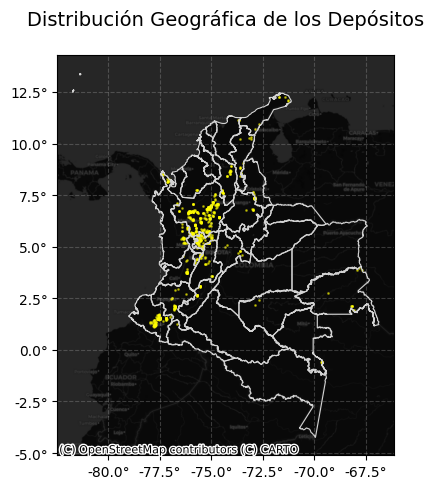

In [48]:
ruta = r"C:/Git_SCA/AGE/Depositos"
gdf = gpd.read_file(ruta)
gdf = gdf.to_crs(epsg=3857)
gdf_latlon = gdf.to_crs(epsg=4326)
gdf['Longitude'] = gdf_latlon.geometry.x
gdf['Latitude'] = gdf_latlon.geometry.y
areas_path = r"C:/Git_SCA/AGE/departamentos"
areas = gpd.read_file(areas_path).to_crs(epsg=4326)
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(gdf['Longitude'], gdf['Latitude'], s=1, c="xkcd:bright yellow", alpha=0.5)
areas.plot(ax=ax, facecolor="none", edgecolor="lightgray", linewidth=0.8)
ctx.add_basemap(ax, crs="EPSG:4326", source=ctx.providers.CartoDB.DarkMatter)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.1f}°"))
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y:.1f}°"))
ax.grid(True, linestyle="--", alpha=0.3)
ax.set_title("Distribución Geográfica de los Depósitos\n", fontsize=14)
plt.tight_layout()
plt.show()


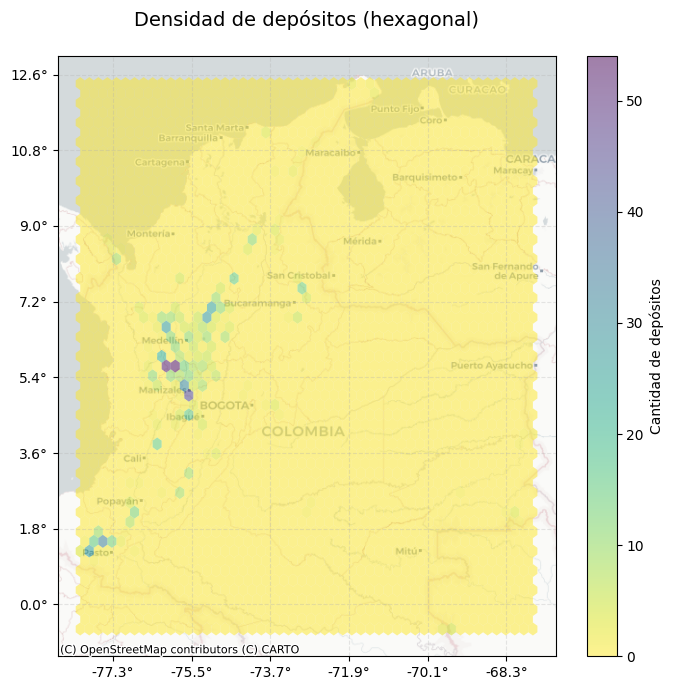

In [47]:
gdf = gpd.read_file(r"C:/Git_SCA/AGE/Depositos").to_crs(epsg=3857)
gdf['x'] = gdf.geometry.x
gdf['y'] = gdf.geometry.y
fig, ax = plt.subplots(1, figsize=(7, 7))
hb = ax.hexbin(
    gdf['x'], gdf['y'],
    gridsize=50,
    linewidths=0,
    alpha=0.5,
    cmap='viridis_r'
)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs=gdf.crs)
def mercator_to_lon(x, _): return f"{x * 180 / 20037508.34:.1f}°"
def mercator_to_lat(y, _): return f"{y * 180 / 20037508.34:.1f}°"
ax.xaxis.set_major_formatter(FuncFormatter(mercator_to_lon))
ax.yaxis.set_major_formatter(FuncFormatter(mercator_to_lat))
ax.grid(True, linestyle="--", alpha=0.3)
plt.colorbar(hb, ax=ax, label='Cantidad de depósitos')
ax.set_title("Densidad de depósitos (hexagonal)\n", fontsize=14)
plt.tight_layout()
plt.show()


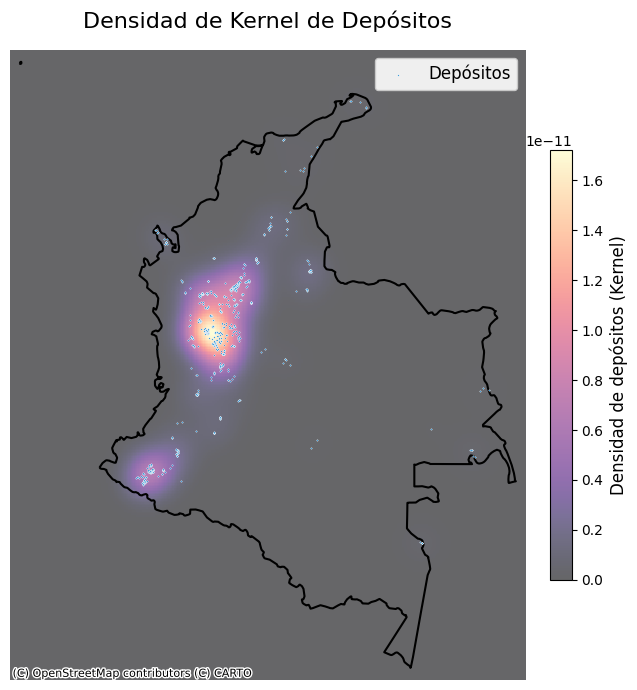

In [61]:

gdf_dep = gpd.read_file("C:/Git_SCA/AGE/Depositos").to_crs(epsg=3857)
gdf_col = gpd.read_file("C:/Git_SCA/AGE/Area_Col").to_crs(epsg=3857)
coords = np.vstack([gdf_dep.geometry.x, gdf_dep.geometry.y]).T
kde = KernelDensity(bandwidth=50000, kernel="gaussian", algorithm="ball_tree")
kde.fit(coords)
minx, miny, maxx, maxy = gdf_col.total_bounds
pad = 0.02  # pequeño margen
dx, dy = maxx-minx, maxy-miny
minx, maxx = minx-pad*dx, maxx+pad*dx
miny, maxy = miny-pad*dy, maxy+pad*dy
n = 400
xv = np.linspace(minx, maxx, n)
yv = np.linspace(miny, maxy, n)
X, Y = np.meshgrid(xv, yv)
grid_pts = np.vstack([X.ravel(), Y.ravel()]).T
Z = np.exp(kde.score_samples(grid_pts)).reshape(n, n)
fig, ax = plt.subplots(1,1, figsize=(7,7))
ax.set_facecolor("white")
ctx.add_basemap(
    ax, 
    source=ctx.providers.CartoDB.Positron, 
    zoom=6, 
    alpha=0.5
)
mesh = ax.pcolormesh(
    X, Y, Z, 
    cmap="magma", 
    shading="auto", 
    alpha=0.6,
    zorder=1
)
gdf_col.boundary.plot(
    ax=ax, 
    edgecolor="black", 
    linewidth=1.5,
    zorder=2
)
gdf_dep.plot(
    ax=ax,
    markersize=1,
    color="#007acc",
    edgecolor="white",
    linewidth=0.3,
    label="Depósitos",
    zorder=3
)
cbar = fig.colorbar(
    mesh, 
    ax=ax, 
    fraction=0.035, 
    pad=0.04
)
cbar.set_label("Densidad de depósitos (Kernel)", fontsize=12)
cbar.ax.tick_params(labelsize=10)
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
ax.set_axis_off()
ax.legend(
    loc="upper right", 
    frameon=True, 
    framealpha=0.9, 
    fontsize=12
)
ax.set_title(
    "Densidad de Kernel de Depósitos", 
    fontsize=16, 
    pad=16
)
plt.tight_layout()
plt.show()


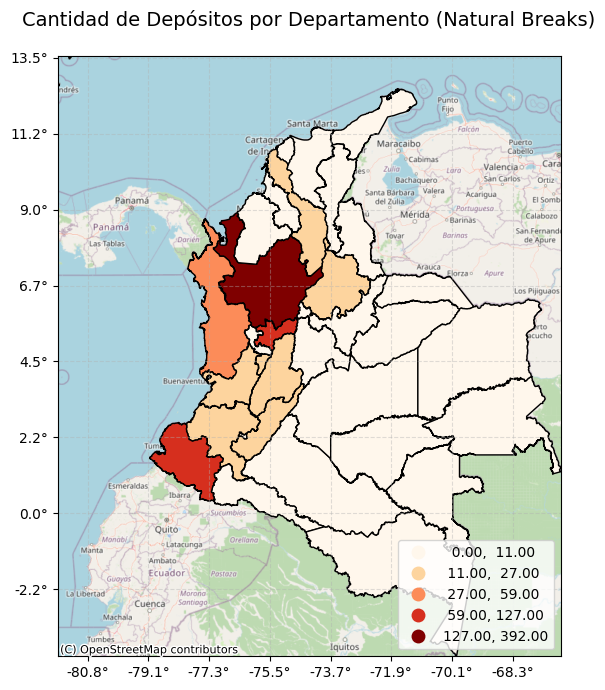

In [46]:
departamentos = gpd.read_file(r"C:/Git_SCA/AGE/departamentos").to_crs(epsg=3857)
join = gpd.sjoin(gdf, departamentos, predicate='within')
conteo = join.groupby('DeNombre').size().reset_index(name='depositos')
departamentos = departamentos.merge(conteo, on='DeNombre', how='left')
departamentos['depositos'] = departamentos['depositos'].fillna(0)
fig, ax = plt.subplots(figsize=(7, 7))
departamentos.plot(
    column='depositos',
    cmap='OrRd',
    scheme='natural_breaks',
    k=5,
    legend=True,
    legend_kwds={'loc': 'lower right'},
    edgecolor='black', linestyle="-",
    ax=ax
)
minx, miny, maxx, maxy = departamentos.total_bounds
ax.set_xlim([minx, maxx])
ax.set_ylim([miny, maxy])
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x * 180 / 20037508.34:.1f}°"))
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y * 180 / 20037508.34:.1f}°"))
ax.grid(True, linestyle="--", alpha=0.4)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs='EPSG:3857')
plt.title("Cantidad de Depósitos por Departamento (Natural Breaks)\n", fontsize=14)
plt.tight_layout()
plt.show()


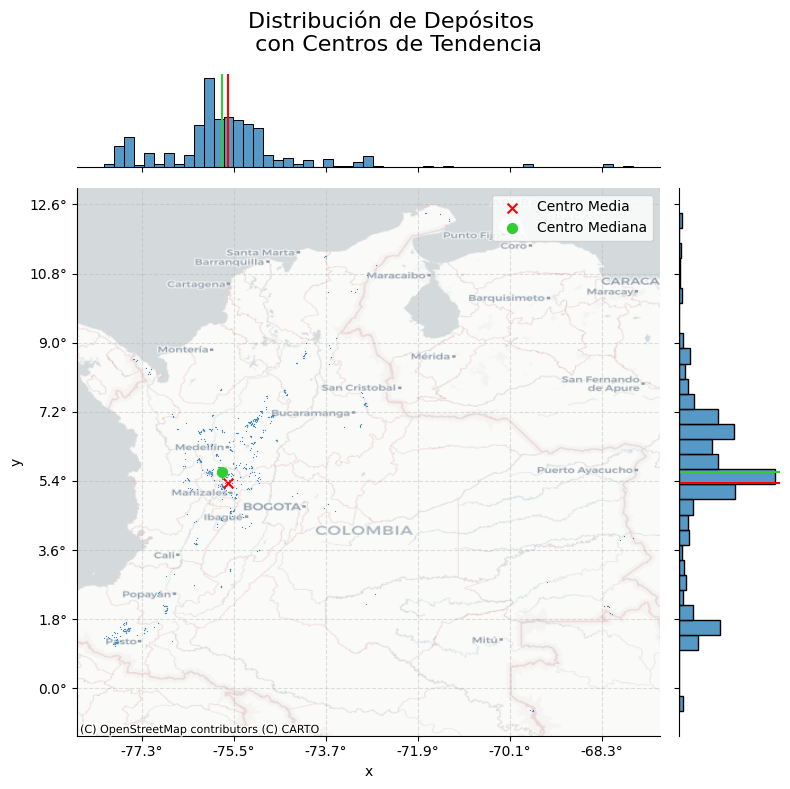

In [45]:
gdf = gpd.read_file("C:/Git_SCA/AGE/Depositos").to_crs(epsg=3857)
gdf['x'] = gdf.geometry.x
gdf['y'] = gdf.geometry.y
mean_center = (gdf['x'].mean(), gdf['y'].mean())
med_center = (gdf['x'].median(), gdf['y'].median())
joint_axes = sns.jointplot(x='x', y='y', data=gdf, s=0.75, height=8)
joint_axes.ax_joint.scatter(*mean_center, color='red', marker='x', s=50, label='Centro Media')
joint_axes.ax_marg_x.axvline(mean_center[0], color='red')
joint_axes.ax_marg_y.axhline(mean_center[1], color='red')
joint_axes.ax_joint.scatter(*med_center, color='limegreen', marker='o', s=50, label='Centro Mediana')
joint_axes.ax_marg_x.axvline(med_center[0], color='limegreen')
joint_axes.ax_marg_y.axhline(med_center[1], color='limegreen')
joint_axes.ax_joint.legend()
ctx.add_basemap(joint_axes.ax_joint, crs="EPSG:3857", source=ctx.providers.CartoDB.Positron)
def mercator_to_lon(x, _): return f"{x * 180 / 20037508.34:.1f}°"
def mercator_to_lat(y, _): return f"{y * 180 / 20037508.34:.1f}°"
joint_axes.ax_joint.xaxis.set_major_formatter(FuncFormatter(mercator_to_lon))
joint_axes.ax_joint.yaxis.set_major_formatter(FuncFormatter(mercator_to_lat))
joint_axes.ax_joint.grid(True, linestyle="--", alpha=0.4)
joint_axes.fig.suptitle("Distribución de Depósitos \n con Centros de Tendencia", fontsize=16)
joint_axes.fig.tight_layout()
joint_axes.fig.subplots_adjust(top=0.90)
plt.show()


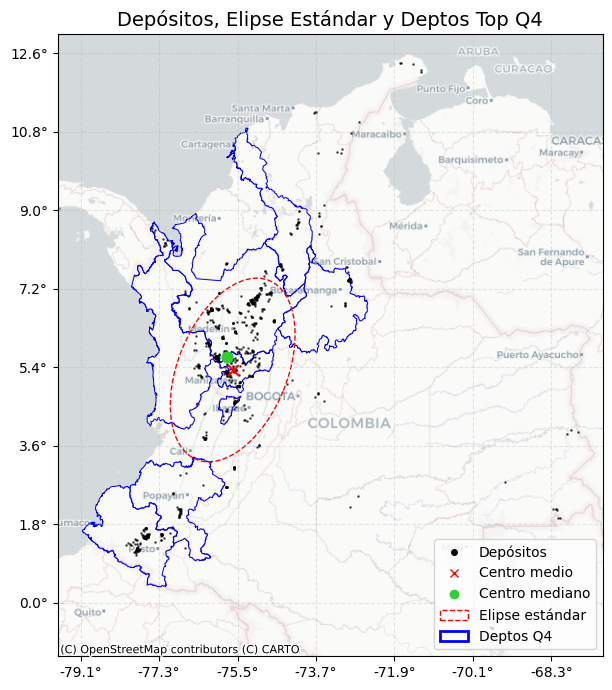

C:\TEMP\ipykernel_18012\365815420.py:59: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(loc='lower right')


<Figure size 640x480 with 0 Axes>

In [44]:
gdf = gpd.read_file(r"C:/Git_SCA/AGE/Depositos").to_crs(epsg=3857)
departamentos = gpd.read_file(r"C:/Git_SCA/AGE/departamentos").to_crs(epsg=3857)
gdf['x'], gdf['y'] = gdf.geometry.x, gdf.geometry.y
joined = gpd.sjoin(gdf, departamentos, predicate='within')
counts = joined.groupby('DeNombre').size().reset_index(name='count')
departamentos = departamentos.merge(counts, on='DeNombre', how='left').fillna({'count': 0})
q4 = departamentos['count'].quantile(0.75)
top_depts = departamentos[departamentos['count'] > q4]
coords = gdf[['x','y']].values
mean_center = coords.mean(axis=0)
med_center = np.median(coords, axis=0)
cov = np.cov(coords.T)
eigs, vecs = np.linalg.eigh(cov)
order = eigs.argsort()[::-1]
eigs, vecs = eigs[order], vecs[:, order]
angle = np.degrees(np.arctan2(*vecs[:,0][::-1]))
width, height = 2*np.sqrt(eigs)
factor_90 = 2.146
ellipse90 = Ellipse(
    xy=mean_center,
    width=width * factor_90,
    height=height * factor_90,
    angle=angle,
    edgecolor='orange',
    facecolor='none',
    linestyle=':',
    linewidth=2,
    label='Elipse 90 %'
)
ax.add_patch(ellipse90)
fig, ax = plt.subplots(figsize=(7,7))
top_depts.plot(ax=ax, facecolor='none', edgecolor='blue', linewidth=0.7, label='Top 25% Deptos')
ax.scatter(gdf['x'], gdf['y'], s=0.75, alpha=0.6, color='black', label='Depósitos')
ax.scatter(*mean_center, color='red', marker='x', s=60, label='Centro medio')
ax.scatter(*med_center, color='limegreen', marker='o', s=60, label='Centro mediano')
ellipse = Ellipse(mean_center, width, height, angle=angle,
                  edgecolor='red', facecolor='none', linestyle='--', label='Elipse estándar')
ax.add_patch(ellipse)
ctx.add_basemap(ax, crs=gdf.crs, source=ctx.providers.CartoDB.Positron)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x*180/20037508.34:.1f}°"))
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y*180/20037508.34:.1f}°"))
ax.grid(True, linestyle="--", alpha=0.3)
def mercator_to_lon(x, _): return f"{x * 180 / 20037508.34:.1f}°"
def mercator_to_lat(y, _): return f"{y * 180 / 20037508.34:.1f}°"
ax.xaxis.set_major_formatter(FuncFormatter(mercator_to_lon))
ax.yaxis.set_major_formatter(FuncFormatter(mercator_to_lat))
ax.grid(True, linestyle="--", alpha=0.3)
ax.set_title("Depósitos, Elipse Estándar y Deptos Top Q4", fontsize=14)
legend_elements = [
    Line2D([0], [0], marker='o', color='black', label='Depósitos', markersize=4, linestyle='None'),
    Line2D([0], [0], marker='x', color='red', label='Centro medio', markersize=6, linestyle='None'),
    Line2D([0], [0], marker='o', color='limegreen', label='Centro mediano', markersize=6, linestyle='None'),
    Patch(facecolor='none', edgecolor='red', linestyle='--', label='Elipse estándar'),
    Patch(facecolor='none', edgecolor='blue', linewidth=2, label='Deptos Q4')
]
ax.legend(handles=legend_elements, loc='lower right')
plt.tight_layout()
plt.show()
ax.legend(loc='lower right')
ax.set_title("Depósitos, Elipse Estándar y Deptos Top Q4", fontsize=14)
ax.set_axis_off()
plt.tight_layout()
plt.show()


C:\TEMP\ipykernel_18012\2322298005.py:5: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  hull_polygon = gdf_colombia.geometry.unary_union
c:\Git_SCA\AGE\.venv\Lib\site-packages\contextily\tile.py:645: UserWarning: The inferred zoom level of 27 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


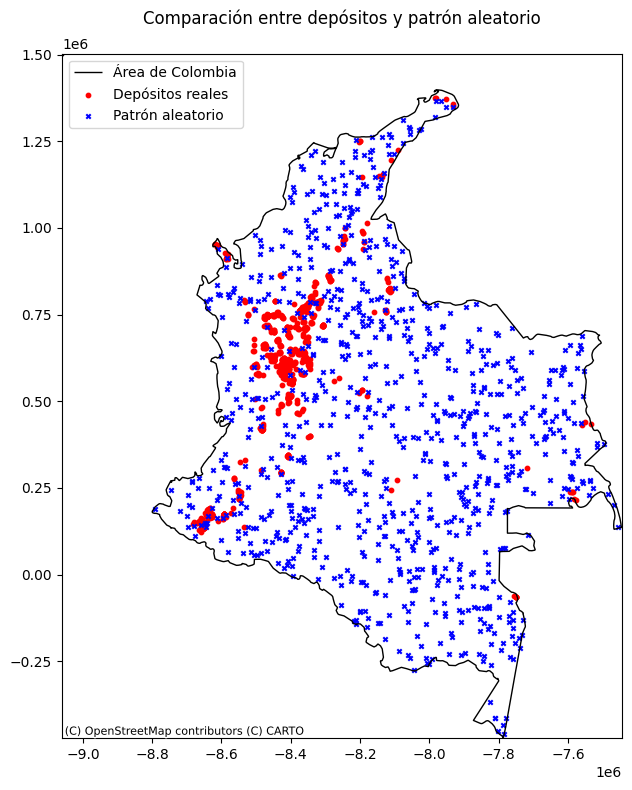

In [41]:
ruta_shape_secundario = r"C:/Git_SCA/AGE/Depositos"
ruta_colombia = r"C:/Git_SCA/AGE/Area_Col"
gdf_secundario = gpd.read_file(ruta_shape_secundario).to_crs(epsg=3857)
gdf_colombia = gpd.read_file(ruta_colombia).to_crs(epsg=3857)
hull_polygon = gdf_colombia.geometry.unary_union
n_points = len(gdf_secundario)
random_points = random.poisson(hull_polygon, size=n_points)
gdf_random = gpd.GeoDataFrame(geometry=[Point(xy) for xy in random_points], crs=gdf_colombia.crs)
fig, ax = plt.subplots(figsize=(8, 8))
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
ax.set_xlim(gdf_colombia.total_bounds[[0, 2]])
ax.set_ylim(gdf_colombia.total_bounds[[1, 3]])
gdf_colombia.boundary.plot(ax=ax, edgecolor='black', linewidth=1, label='Área de Colombia')
gdf_secundario.plot(ax=ax, color='red', markersize=10, label='Depósitos reales')
gdf_random.plot(ax=ax, color='blue', markersize=10, marker='x', label='Patrón aleatorio')
ax.legend()
ax.set_title("Comparación entre depósitos y patrón aleatorio\n")
plt.tight_layout()
plt.show()


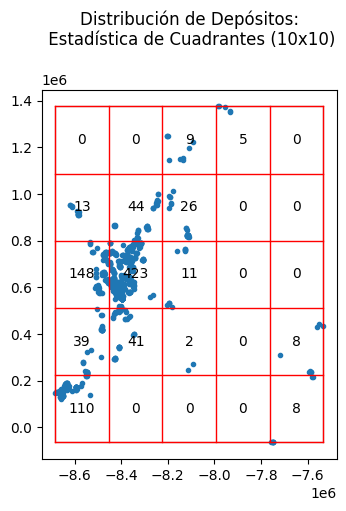

p-valor (chi² test): 0.00000
➡️ Distribución NO aleatoria: hay agrupamiento (clustering) significativo.


In [54]:
ruta_depositos = r"C:/Git_SCA/AGE/Depositos"
gdf = gpd.read_file(ruta_depositos).to_crs(epsg=3857)
gdf['x'] = gdf.geometry.x
gdf['y'] = gdf.geometry.y
coordinates = gdf[['x', 'y']].values
qstat = QStatistic(coordinates, nx=5, ny=5)
qstat.plot()
plt.title("Distribución de Depósitos:\n Estadística de Cuadrantes (10x10)\n")
plt.show()
print(f"p-valor (chi² test): {qstat.chi2_pvalue:.5f}")
if qstat.chi2_pvalue < 0.05:
    print("➡️ Distribución NO aleatoria: hay agrupamiento (clustering) significativo.")
else:
    print("➡️ No hay evidencia significativa de agrupamiento (podría ser aleatoria).")


C:\TEMP\ipykernel_18012\1946150901.py:19: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Git_SCA\AGE\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


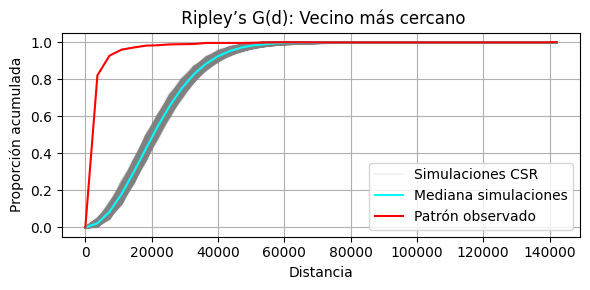

In [57]:
gdf = gpd.read_file(r"C:/Git_SCA/AGE/Depositos").to_crs(epsg=3857)
coordinates = gdf.geometry.apply(lambda geom: (geom.x, geom.y)).to_list()
coordinates = np.array(coordinates)
g_test = distance_statistics.g_test(coordinates, support=40, keep_simulations=True)
plt.figure(figsize=(6, 3))
support_len = len(g_test.support)
for i in range(g_test.simulations.shape[0]):
    if i == 0:
        plt.plot(g_test.support, g_test.simulations[i, :support_len], color='gray', alpha=0.1, label='Simulaciones CSR')
    else:
        plt.plot(g_test.support, g_test.simulations[i, :support_len], color='gray', alpha=0.1)
plt.plot(g_test.support, np.median(g_test.simulations[:, :support_len], axis=0), color='cyan', label='Mediana simulaciones')
plt.plot(g_test.support, g_test.statistic[:support_len], color='red', label='Patrón observado')
plt.title(" Ripley’s G(d): Vecino más cercano")
plt.xlabel("Distancia")
plt.ylabel("Proporción acumulada")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\TEMP\ipykernel_18012\728547752.py:19: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Git_SCA\AGE\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


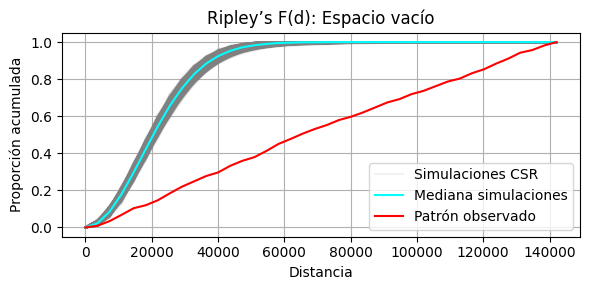

In [58]:
gdf = gpd.read_file(r"C:/Git_SCA/AGE/Depositos").to_crs(epsg=3857)
coordinates = gdf.geometry.apply(lambda geom: (geom.x, geom.y)).to_list()
coordinates = np.array(coordinates)
f_test = distance_statistics.f_test(coordinates, support=40, keep_simulations=True)
plt.figure(figsize=(6, 3))
support_len = len(f_test.support)
for i in range(f_test.simulations.shape[0]):
    if i == 0:
        plt.plot(f_test.support, f_test.simulations[i, :support_len], color='gray', alpha=0.1, label='Simulaciones CSR')
    else:
        plt.plot(f_test.support, f_test.simulations[i, :support_len], color='gray', alpha=0.1)
plt.plot(f_test.support, np.median(f_test.simulations[:, :support_len], axis=0), color='cyan', label='Mediana simulaciones')
plt.plot(f_test.support, f_test.statistic[:support_len], color='red', label='Patrón observado')
plt.title("Ripley’s F(d): Espacio vacío")
plt.xlabel("Distancia")
plt.ylabel("Proporción acumulada")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


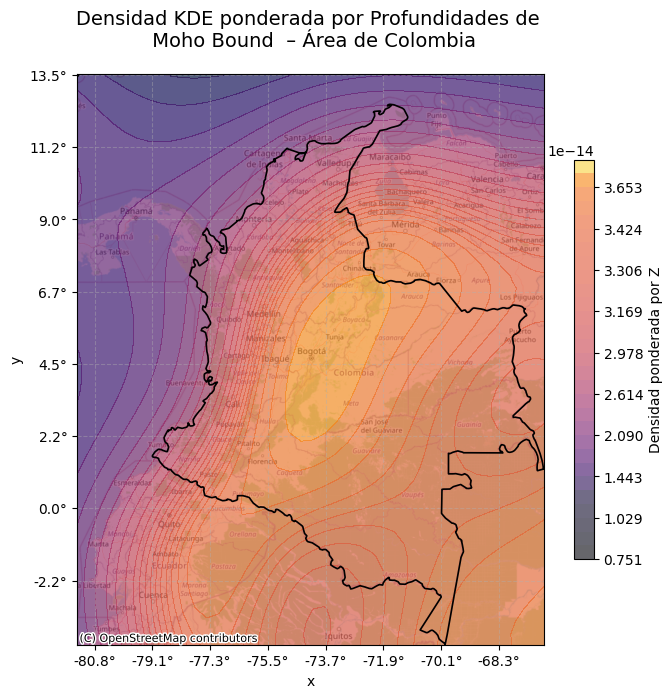

In [67]:
gdf = gpd.read_file("C:/Git_SCA/AGE/Corteza").to_crs(epsg=3857)
colombia = gpd.read_file("C:/Git_SCA/AGE/Area_Col").to_crs(epsg=3857)
colombia = colombia[~colombia.geometry.is_empty & colombia.geometry.is_valid]
#Filtrar puntos dentro de Colombia
#gdf = gdf[gdf.geometry.within(colombia.unary_union)]
df = pd.DataFrame({
    'x': gdf.geometry.x,
    'y': gdf.geometry.y,
    'z': gdf['Z']
})
fig, ax = plt.subplots(figsize=(7, 7))
kde = sns.kdeplot(
    data=df,
    x='x', y='y',
    weights='z',
    fill=True,
    cmap='inferno',
    alpha=0.6,
    bw_adjust=0.6,
    levels=30,
    ax=ax
)
colombia.boundary.plot(ax=ax, edgecolor='black', linewidth=1.2)
def mercator_to_lon(x, _): return f"{x * 180 / 20037508.34:.1f}°"
def mercator_to_lat(y, _): return f"{y * 180 / 20037508.34:.1f}°"
ax.xaxis.set_major_formatter(FuncFormatter(mercator_to_lon))
ax.yaxis.set_major_formatter(FuncFormatter(mercator_to_lat))
ax.grid(True, linestyle="--", alpha=0.4)
bounds = colombia.total_bounds
ax.set_xlim(bounds[0], bounds[2])
ax.set_ylim(bounds[1], bounds[3])
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs='EPSG:3857')
mappable = ax.collections[0]
cbar = plt.colorbar(mappable, ax=ax, shrink=0.7, label="Densidad ponderada por Z")
plt.title("Densidad KDE ponderada por Profundidades de \n Moho Bound  – Área de Colombia", fontsize=14, pad=20)
plt.tight_layout()
plt.show()
